# Exploratory Analysis

In [86]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np


%matplotlib inline


In [87]:
data_raw = pd.read_csv("datasets/autoplay_v4.csv")
data_raw.fillna(0, inplace=True)

print data_raw.head()

   userid  autoplayed_series_id  rewatched  genre  macro_genre  \
0   66550                 15354          1     27           34   
1   70698                 34254          0     14           35   
2   72583                 34177          1     26           33   
3   73488                 24620          0     11           34   
4   82220                 14871          0     19           36   

   previous_series_id  genre_prev  macro_genre_prev  hourofday  \
0               31676          26                33          1   
1               33587          14                35         17   
2               30439          27                34          1   
3               15195          25                35         16   
4               35240           3                33         19   

   series_popularity    ...     genre_28  genre_29  genre_30  genre_31  \
0                800    ...          0.0    0.0000       0.0       0.0   
1               5916    ...          0.0    0.0000       0

## Preliminary Analysis
####  Drop Null / Observation count

In [197]:
data = data_raw.dropna() 
data_edit = data_raw
data_edit['total_consumption'] = data_edit['genre_33'] + data_edit['genre_34'] + data_edit['genre_35'] + data_edit['genre_36'] + data_edit['genre_37']
data_edit['same_previous_genre'] = np.where(data_edit['genre'] == data_edit['genre_prev'], 1,0)
data_edit['same_previous_macro_genre'] = np.where(data_edit['macro_genre'] == data_edit['macro_genre_prev'], 1,0)
data_edit['time_of_day'] = np.where(data_edit['hourofday'] > 7, np.where(data_edit['hourofday'] > 18,'evening','daytime'),'late_night')
timedummy = (pd.get_dummies(data_edit['time_of_day']))
data_edit = data_edit.join(timedummy[['daytime', 'evening', 'late_night']])
data_edit = data_edit[~(data_edit['genre'] == 32)] 
data = data_edit[['rewatched','total_consumption','genre','macro_genre','same_previous_genre', 'same_previous_macro_genre','time_of_day','daytime','evening','late_night','genre_prev','macro_genre_prev','series_popularity','genre_popularity','same_genre_percent_watched','same_macro_genre_percent_watched']]
print data.head()

print data.count()


   rewatched  total_consumption  genre  macro_genre  same_previous_genre  \
0          1        1296.681883     27           34                    0   
1          0        6099.655533     14           35                    1   
2          1       15174.247814     26           33                    0   
3          0        2635.334800     11           34                    0   
4          0        2461.840700     19           36                    0   

   same_previous_macro_genre time_of_day  daytime  evening  late_night  \
0                          0  late_night        0        0           1   
1                          1     daytime        1        0           0   
2                          0  late_night        0        0           1   
3                          0     daytime        1        0           0   
4                          0     evening        0        1           0   

   genre_prev  macro_genre_prev  series_popularity  genre_popularity  \
0          26             

After excluding Null records, the dataset includes x unique observations.

#### Summary table

In [89]:
print data.describe()

           rewatched  total_consumption          genre    macro_genre  \
count  173993.000000      173993.000000  173993.000000  173993.000000   
mean        0.280793        5014.309858      15.468387      34.327938   
std         0.449388        5071.428938       8.259989       1.104002   
min         0.000000           0.000000       1.000000      33.000000   
25%         0.000000        1482.421800       8.000000      33.000000   
50%         0.000000        3436.059916      14.000000      34.000000   
75%         1.000000        6842.748416      24.000000      35.000000   
max         1.000000       54352.125400      31.000000      36.000000   

       same_previous_genre  same_previous_macro_genre        daytime  \
count         173993.00000              173993.000000  173993.000000   
mean               0.46103                   0.582960       0.432402   
std                0.49848                   0.493071       0.495411   
min                0.00000                   0.000000 

#### Preliminary observations

In [90]:
Preliminary observations on each independent var

SyntaxError: invalid syntax (<ipython-input-90-a7547df83bf1>, line 1)

#### Box plots for Independent Variables

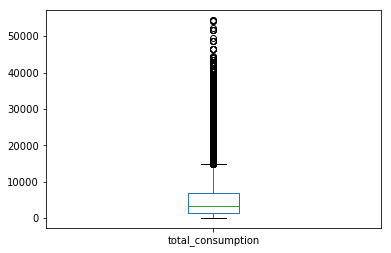

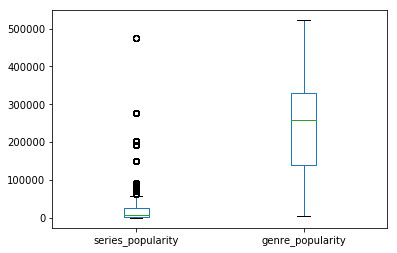

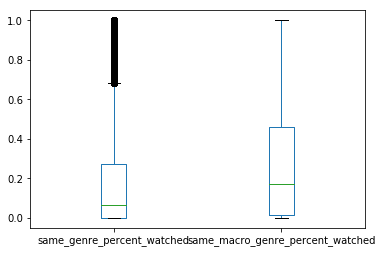

In [91]:
data[['total_consumption']].plot(kind='box')
data[['series_popularity','genre_popularity']].plot(kind='box')
data[['same_genre_percent_watched','same_macro_genre_percent_watched']].plot(kind='box')

In [92]:
Comment on boxplots

SyntaxError: invalid syntax (<ipython-input-92-cff70bf89e76>, line 1)

#### Distribution description 

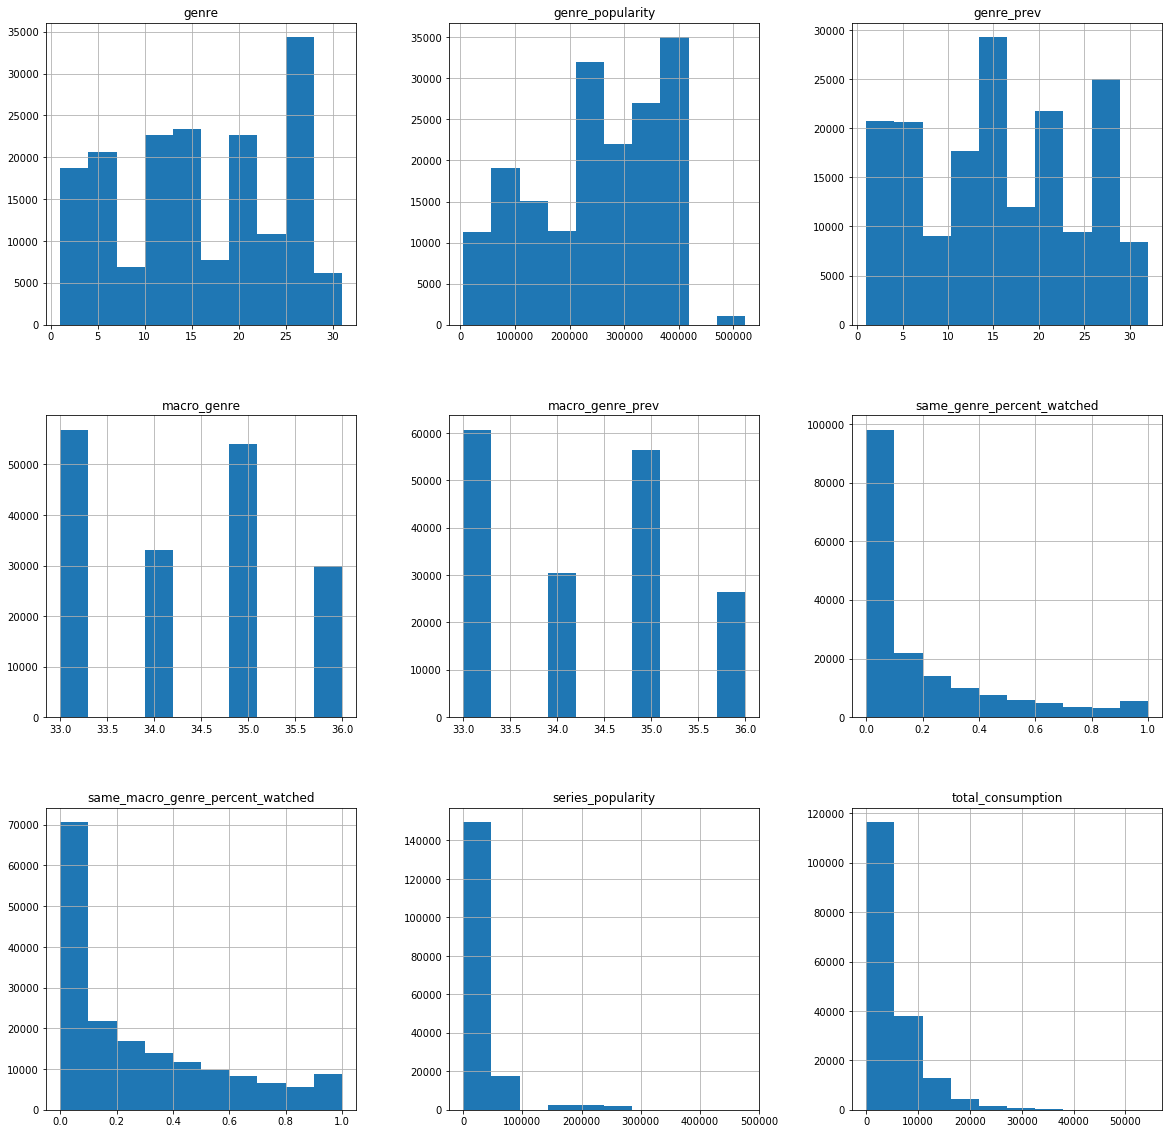

In [94]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data[['genre','macro_genre','genre_prev','macro_genre_prev','series_popularity','genre_popularity','same_genre_percent_watched','same_macro_genre_percent_watched','total_consumption']].hist(ax=ax)
pl.show()

Comment on distribution

#### Correlation

In [78]:
data.corr()

rewatched  total_consumption     genre  \
rewatched                          1.000000           0.033597  0.061650   
total_consumption                  0.033597           1.000000  0.064693   
genre                              0.061650           0.064693  1.000000   
macro_genre                       -0.028773           0.031305  0.001648   
same_previous_genre               -0.066094          -0.024739  0.172128   
same_previous_macro_genre         -0.044383          -0.017678  0.173184   
daytime                            0.040080           0.004714  0.072860   
evening                            0.069203          -0.054507  0.007624   
late_night                        -0.108730           0.046705 -0.085427   
genre_prev                         0.070911           0.064213  0.654386   
macro_genre_prev                  -0.005163           0.030716  0.046903   
series_popularity                  0.096457          -0.060922 -0.117282   
genre_popularity                   0.056404          -0.022396 -0.086947   
same_genre_percent_watched         0.024635          -0.083321  0.165740   
same_macro_genre_percent_watched   0.002851          -0.050960 -0.074307   

                                  macro_genre  same_previous_genre  \
rewatched                           -0.028773            -0.066094   
total_consumption                    0.031305            -0.024739   
genre                                0.001648             0.172128   
macro_genre                          1.000000            -0.074588   
same_previous_genre                 -0.074588             1.000000   
same_previous_macro_genre           -0.050776             0.782261   
daytime                             -0.040441            -0.022589   
evening                              0.018081            -0.033798   
late_night                           0.026227             0.056337   
genre_prev                          -0.036981             0.148377   
macro_genre_prev                     0.353162            -0.034368   
series_popularity                   -0.084874            -0.142839   
genre_popularity                    -0.275663             0.113808   
same_genre_percent_watched          -0.052311             0.353226   
same_macro_genre_percent_watched    -0.189515             0.020989   

                                  same_previous_macro_genre   daytime  \
rewatched                                         -0.044383  0.040080   
total_consumption                                 -0.017678  0.004714   
genre                                              0.173184  0.072860   
macro_genre                                       -0.050776 -0.040441   
same_previous_genre                                0.782261 -0.022589   
same_previous_macro_genre                          1.000000 -0.011788   
daytime                                           -0.011788  1.000000   
evening                                           -0.019113 -0.516843   
late_night                                         0.030801 -0.582277   
genre_prev                                         0.159586  0.065546   
macro_genre_prev                                   0.000913 -0.050239   
series_popularity                                 -0.121896  0.001971   
genre_popularity                                   0.053562  0.054604   
same_genre_percent_watched                         0.270216 -0.003458   
same_macro_genre_percent_watched                   0.050231 -0.017451   

                                   evening  late_night  genre_prev  \
rewatched                         0.069203   -0.108730    0.070911   
total_consumption                -0.054507    0.046705    0.064213   
genre                             0.007624   -0.085427    0.654386   
macro_genre                       0.018081    0.026227   -0.036981   
same_previous_genre              -0.033798    0.056337    0.148377   
same_previous_macro_genre        -0.019113    0.030801    0.159586   
daytime                          -0.5

Comments on collinearity

#### 

Comments

## Revisions on original work plan

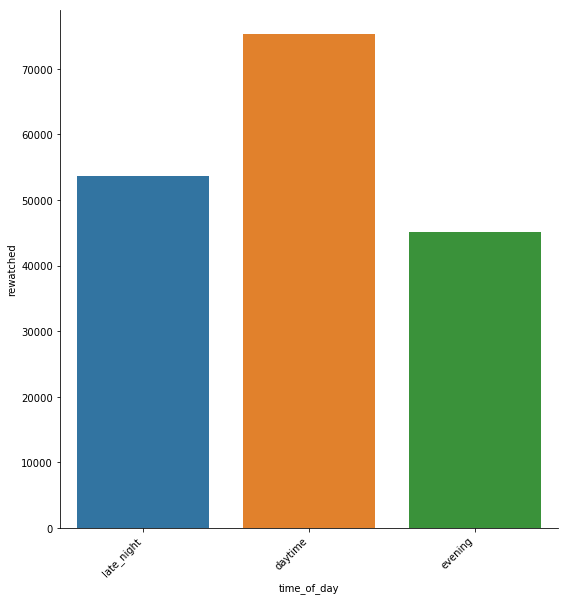

In [117]:
import seaborn as sb
%matplotlib inline

p = sb.factorplot(x='time_of_day', 
              y='rewatched',
              kind='bar',
              data = data,
              size = 8,
              estimator=len
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

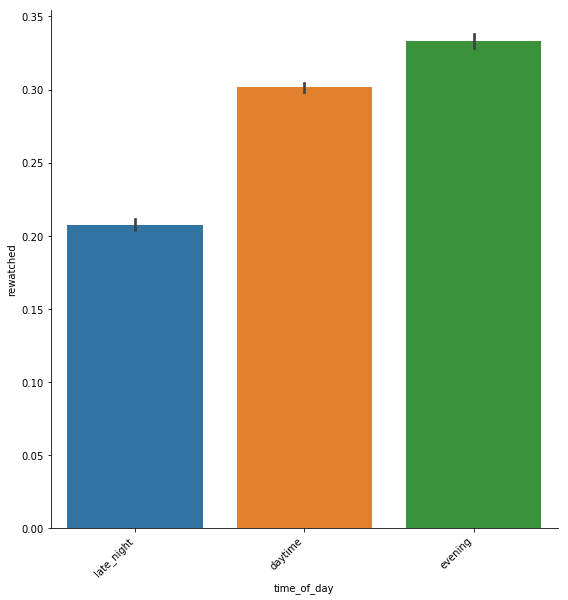

In [118]:
p = sb.factorplot(x='time_of_day', 
              y='rewatched',
              kind='bar',
              data = data,
              size = 8
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

#### 

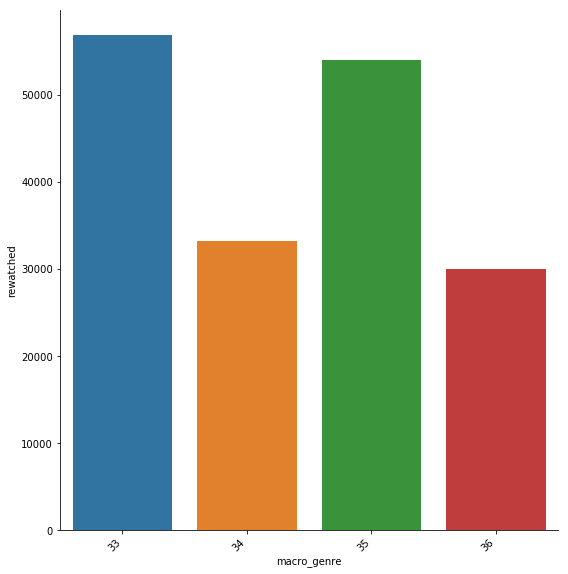

In [119]:
p = sb.factorplot(x='macro_genre', 
              y='rewatched',
              kind='bar',
              data = data,
              size = 8,
              estimator=len
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

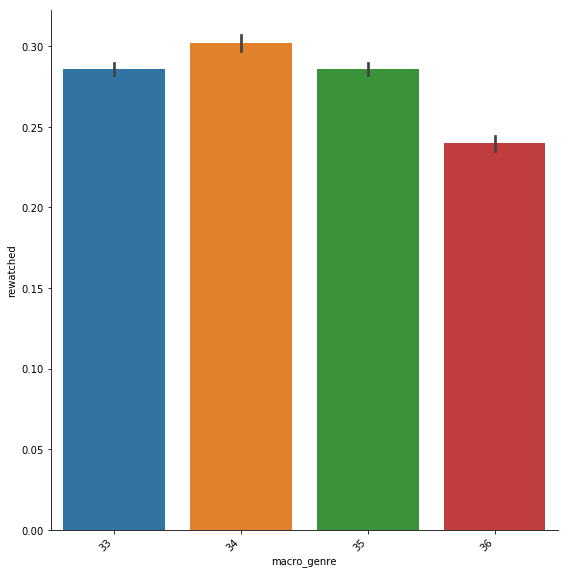

In [120]:
p = sb.factorplot(x='macro_genre', 
              y='rewatched',
              kind='bar',
              data = data,
              size = 8
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

p = sb.factorplot(x='macro_genre', 
              y='rewatched',
              kind='bar',
              data = data,
              size = 8,
              estimator=len
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

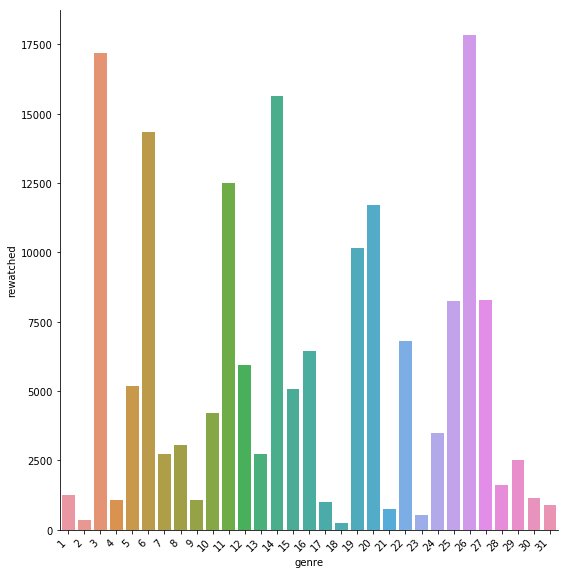

In [116]:
p = sb.factorplot(x='genre', 
              y='rewatched',
              kind='bar',
              data = data,
              size = 8,
              estimator=len
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

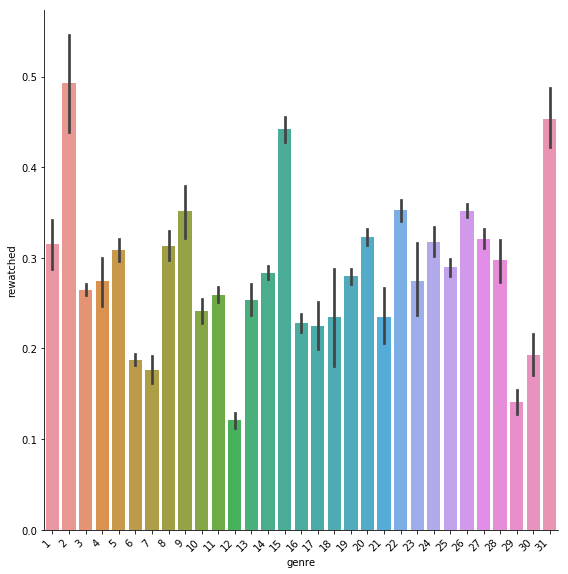

In [115]:
p = sb.factorplot(x='genre', 
              y='rewatched',
              kind='bar',
              data = data,
              size = 8
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

# Random Forest

In [131]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X, y)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

In [135]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.55260584  0.5575273   0.55629121  0.5540491   0.54342814], Average AUC 0.552780317303


In [136]:
model = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)

model.fit(X, y)
build_tree_image(model)

In [137]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

Features  Importance Score
1                  total_consumption          0.424335
3   same_macro_genre_percent_watched          0.307899
4                  series_popularity          0.193351
5                   genre_popularity          0.041217
2          same_previous_macro_genre          0.009169
6                            daytime          0.007890
7                            evening          0.007158
10                                35          0.003716
9                                 34          0.002772
8                                 33          0.002492

In [141]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.62780268  0.63031889  0.6153364 ], Average AUC 0.624485987897
n trees: 1, CV AUC [ 0.54771236  0.54586377  0.54043107], Average AUC 0.544669067738
n trees: 11, CV AUC [ 0.62174978  0.6198834   0.60670818], Average AUC 0.616113786962
n trees: 21, CV AUC [ 0.6287753   0.6308413   0.61342149], Average AUC 0.624346028704
n trees: 31, CV AUC [ 0.63196009  0.63574403  0.6182381 ], Average AUC 0.628647405073
n trees: 41, CV AUC [ 0.63398674  0.63607497  0.61977586], Average AUC 0.629945853563
n trees: 51, CV AUC [ 0.63679308  0.63789074  0.62203756], Average AUC 0.632240461475
n trees: 61, CV AUC [ 0.63682028  0.63740866  0.62357176], Average AUC 0.632600230402
n trees: 71, CV AUC [ 0.63796455  0.63740721  0.62466851], Average AUC 0.633346756534
n trees: 81, CV AUC [ 0.63892558  0.6387651   0.62405799], Average AUC 0.633916221457
n trees: 91, CV AUC [ 0.63870589  0.63973091  0.62445006], Average AUC 0.634295618923


## Additional edits and analysis

In [146]:
genre_dummy = (pd.get_dummies(data['genre']))
macro_genre_dummy = (pd.get_dummies(data['macro_genre']))
data = data.join(genre_dummy).join(macro_genre_dummy)

In [147]:
log_vars = data[['series_popularity','genre_popularity']]
log_vars = log_vars.apply(np.log10)
data['series_popularity'] = log_vars['series_popularity']
data['genre_popularity'] = log_vars['genre_popularity']

In [97]:
data[[33,34,35,36]].corr()

33        34        35        36
33  1.000000 -0.338037 -0.467546 -0.317954
34 -0.338037  1.000000 -0.325361 -0.221262
35 -0.467546 -0.325361  1.000000 -0.306032
36 -0.317954 -0.221262 -0.306032  1.000000

## Logistic Regression

In [148]:
X = data[['total_consumption','same_previous_macro_genre','same_macro_genre_percent_watched','series_popularity','genre_popularity','daytime','evening',33,34,35]]
X = sm.add_constant(X)
y = data['rewatched']
lm2 = sm.Logit(y, X)
result2 = lm2.fit()
print data.rewatched.mean()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.580085
         Iterations 5
0.280792905462


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              rewatched   No. Observations:               173993
Model:                          Logit   Df Residuals:                   173982
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 Oct 2017   Pseudo R-squ.:                 0.02293
Time:                        17:47:28   Log-Likelihood:            -1.0093e+05
converged:                       True   LL-Null:                   -1.0330e+05
                                        LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.7004      0.101    -36.519      0.000      -3.899      -3.502
total_consumption                 2.196e-05   1.05e-06     20.922      0.000    1.99e-05     2.4e-05
same_previous_macro_genre           -0.1515      0.011    -13.533      0.000      -0.173      -0.130
same_macro_genre_percent_watched    -0.0719      0.019     -3.769      0.000      -0.109      -0.034
series_popularity                    0.2655      0.008     33.266      0.000       0.250       0.281
genre_popularity                     0.1990      0.019     10.311      0.000       0.161       0.237
daytime                              0.5053      0.013     37.663      0.000       0.479       0.532
evening                              0.6555      0.015     44.454      0.000       0.627       0.684
33                                   0.2085      0.017     12.186      0.000       0.175       0.242
34                                   0.4280      0.019     22.696      0.000       0.391       0.465
35                                   0.3016      0.017     17.561      0.000       0.268       0.335
====================================================================================================
"""

In [99]:
print np.exp(result2.params)

const                               0.024715
total_consumption                   1.000022
same_previous_macro_genre           0.859405
same_macro_genre_percent_watched    0.930651
series_popularity                   1.304132
genre_popularity                    1.220149
daytime                             1.657414
evening                             1.926076
33                                  1.231777
34                                  1.534248
35                                  1.352074
dtype: float64


In [100]:
params = result2.params
conf = result2.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                                      2.5%     97.5%        OR
const                             0.020263  0.030144  0.024715
total_consumption                 1.000020  1.000024  1.000022
same_previous_macro_genre         0.840752  0.878471  0.859405
same_macro_genre_percent_watched  0.896513  0.966088  0.930651
series_popularity                 1.283887  1.324695  1.304132
genre_popularity                  1.174864  1.267180  1.220149
daytime                           1.614403  1.701571  1.657414
evening                           1.871208  1.982553  1.926076
33                                1.191164  1.273775  1.231777
34                                1.478570  1.592022  1.534248
35                                1.307314  1.398366  1.352074


In [101]:
series_pop = np.linspace(data['series_popularity'].min(), data['series_popularity'].max(), 10)
genre_pop = np.linspace(data['genre_popularity'].min(), data['genre_popularity'].max(), 10)
tot_cons = np.linspace(data['total_consumption'].min(), data['total_consumption'].max(), 10)
sm_pw = np.linspace(data['same_macro_genre_percent_watched'].min(), data['same_macro_genre_percent_watched'].max(), 10)
print series_pop
print genre_pop
print tot_cons
print sm_pw

[ 0.          0.63087582  1.26175165  1.89262747  2.52350329  3.15437911
  3.78525494  4.41613076  5.04700658  5.67788241]
[ 3.70526486  3.92882924  4.15239361  4.37595799  4.59952237  4.82308674
  5.04665112  5.27021549  5.49377987  5.71734424]
[     0.           6039.12504444  12078.25008889  18117.37513333
  24156.50017778  30195.62522222  36234.75026667  42273.87531111
  48313.00035556  54352.1254    ]
[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]


In [102]:
def cartesian2(arrays):
    arrays = [np.asarray(a) for a in arrays]
    shape = (len(x) for x in arrays)

    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T

    for n, arr in enumerate(arrays):
        ix[:, n] = arrays[n][ix[:, n]]

    return ix

In [103]:
combos = pd.DataFrame(cartesian2([series_pop, genre_pop,tot_cons, sm_pw, [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[1.]]))
# recreate the dummy variables
combos.columns = ['series_popularity', 'genre_popularity','total_consumption','same_macro_genre_percent_watched','same_previous_macro_genre',33,34,35,'daytime','evening','const']

combos['rewatch_pred'] = result2.predict(combos)
combos['macro_genre'] = np.where(combos[33] == 1, 33,np.where(combos[34] == 1,34,np.where(combos[35] == 1,35,36)))

In [104]:
def isolate_and_plot(variable):
    
    grouped = pd.pivot_table(combos, values=['rewatch_pred'], index=[variable, 'macro_genre'],
                            aggfunc=np.mean)

    colors = 'rbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgyrbgy'
    for col in combos.macro_genre.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['rewatch_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(rewatch=1)")
    pl.legend(['36', '33', '34', '35'], loc='upper left', title='Macro-Genre')
    pl.title("Prob(rewatch=1) isolating " + variable + " and Macro-Genre")
    pl.show()


C:\Users\emanuele.rusina\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


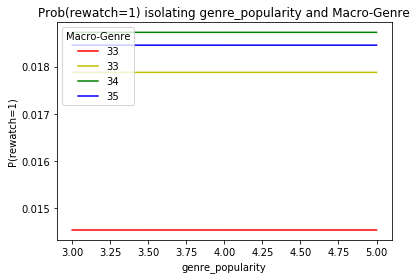

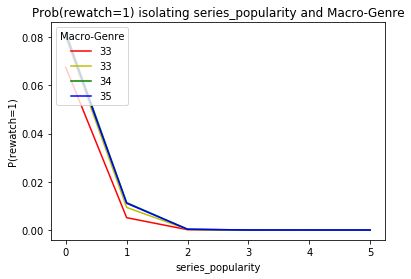

In [65]:
isolate_and_plot('genre_popularity')
isolate_and_plot('series_popularity')

### Logistic Regression

In [152]:
data.head()

rewatched  total_consumption  genre  macro_genre  same_previous_genre  \
0          1        1296.681883     27           34                    0   
1          0        6099.655533     14           35                    1   
2          1       15174.247814     26           33                    0   
3          0        2635.334800     11           34                    0   
4          0        2461.840700     19           36                    0   

   same_previous_macro_genre time_of_day  daytime  evening  late_night ...  \
0                          0  late_night        0        0           1 ...   
1                          1     daytime        1        0           0 ...   
2                          0  late_night        0        0           1 ...   
3                          0     daytime        1        0           0 ...   
4                          0     evening        0        1           0 ...   

   26  27  28  29  30  31  33  34  35  36  
0   0   1   0   0   0   0   0   1   0   0  
1   0   0   0   0   0   0   0   0   1   0  
2   1   0   0   0   0   0   1   0   0   0  
3   0   0   0   0   0   0   0   1   0   0  
4   0   0   0   0   0   0   0   0   0   1  

[5 rows x 51 columns]

In [163]:
X2 = data[['total_consumption','same_previous_genre','same_genre_percent_watched','series_popularity','daytime','evening',1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
X2 = sm.add_constant(X2)
y2 = data['rewatched']
lm2 = sm.Logit(y2, X2)
result1 = lm2.fit()
print data.rewatched.mean()
result1.summary()print np.exp(result2.params)

Optimization terminated successfully.
         Current function value: 0.567625
         Iterations 6
0.280792905462


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              rewatched   No. Observations:               173993
Model:                          Logit   Df Residuals:                   173956
Method:                           MLE   Df Model:                           36
Date:                Sun, 22 Oct 2017   Pseudo R-squ.:                 0.04392
Time:                        17:54:59   Log-Likelihood:                -98763.
converged:                       True   LL-Null:                   -1.0330e+05
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7433      0.054    -68.835      0.000      -3.850      -3.637
total_consumption           1.892e-05   1.08e-06     17.584      0.000    1.68e-05     2.1e-05
same_previous_genre           -0.3790      0.012    -30.413      0.000      -0.403      -0.355
same_genre_percent_watched     0.4366      0.024     18.286      0.000       0.390       0.483
series_popularity              0.3878      0.009     42.520      0.000       0.370       0.406
daytime                        0.4308      0.014     31.413      0.000       0.404       0.458
evening                        0.5998      0.015     39.986      0.000       0.570       0.629
1                              0.9984      0.074     13.535      0.000       0.854       1.143
2                              1.7913      0.118     15.216      0.000       1.561       2.022
3                              0.7707      0.044     17.330      0.000       0.684       0.858
4                              1.3152      0.081     16.281      0.000       1.157       1.474
5                              0.8146      0.051     15.900      0.000       0.714       0.915
6                              0.3080      0.046      6.730      0.000       0.218       0.398
7                              0.2166      0.065      3.345      0.001       0.090       0.343
8                              1.0804      0.057     19.103      0.000       0.970       1.191
9                              1.5030      0.076     19.696      0.000       1.353       1.653
10                             0.6689      0.054     12.331      0.000       0.563       0.775
11                             0.7559      0.045     16.656      0.000       0.667       0.845
13                             0.5401      0.060      8.967      0.000       0.422       0.658
14                             0.9742      0.045     21.829      0.000       0.887       1.062
15                             1.3842      0.050     27.681      0.000       1.286       1.482
16                             0.5107      0.051     10.010      0.000       0.411       0.611
17                             0.9655      0.087     11.079      0.000       0.795       1.136
18                             0.9616      0.158      6.078      0.000       0.652       1.272
19                             0.8022      0.047     17.248      0.000       0.711       0.893
20                             0.9719      0.046     21.296      0.000       0.882       1.061
21                             0.9465      0.096      9.897      0.000       0.759       1.134
22                             1.3791      0.048     28.747      0.000       1.285       1.473
23                             1.5613      0.107     14.641      0.000       1.352       1.770
24                             1.2712      0.055     23.238      0.000       1.164       1.378
25                             0.9374      0.047     19.812      0.000       0.845       1.030
26         

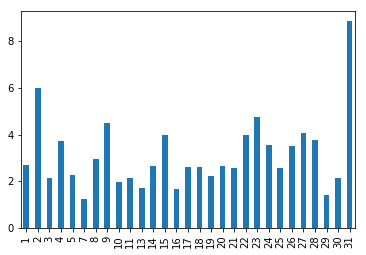

In [196]:
genres_odds = np.exp(result1.params[[7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]])
genres_odds.plot(kind='bar')

In [173]:
params = result1.params
conf = result1.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                                2.5%      97.5%        OR
const                       0.021282   0.026339  0.023676
total_consumption           1.000017   1.000021  1.000019
same_previous_genre         0.668027   0.701470  0.684544
same_genre_percent_watched  1.476748   1.621650  1.547504
series_popularity           1.447664   1.500359  1.473776
daytime                     1.497710   1.580429  1.538514
evening                     1.768957   1.876089  1.821736
1                           2.348537   3.135913  2.713818
2                           4.761647   7.553982  5.997449
3                           1.980825   2.358046  2.161221
4                           3.179967   4.364583  3.725484
5                           2.042436   2.496682  2.258166
6                           1.243999   1.488486  1.360763
7                           1.093834   1.409857  1.241833
8                           2.636782   3.291228  2.945887
9                           3.870654   5.220276  4.495095
10            

In [174]:
print params.head()

const                        -3.743303
total_consumption             0.000019
same_previous_genre          -0.379002
same_genre_percent_watched    0.436643
series_popularity             0.387828
dtype: float64
